In [ ]:
!pip install keras

In [ ]:
!pip install -q imbalanced-learn
!pip install -q tensorflow


importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
df = pd.read_csv(url)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


build the dense neural network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from tensorflow.keras.callbacks import EarlyStopping
import joblib


#  Drop unnecessary column
df.drop(['Time'], axis=1, inplace=True)

#  Separate features and label
X = df.drop(['Class'], axis=1)
y = df['Class']

#  Standard Scaling (29 features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train/Test split before SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#  Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#  Build Dense Model
model_dense = Sequential([
    Dense(64, input_dim=X_train_smote.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#  Train the model
early_stop = EarlyStopping(patience=3, restore_best_weights=True)
model_dense.fit(X_train_smote, y_train_smote, epochs=10, batch_size=512, validation_split=0.2, callbacks=[early_stop])

#  Save model + scaler
model_dense.save("fraud_model_dense.h5")
joblib.dump(scaler, "scaler_dense.pkl")

print(" Dense model trained with SMOTE and saved successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9005 - loss: 0.2161 - val_accuracy: 0.9749 - val_loss: 0.0603
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9844 - loss: 0.0431 - val_accuracy: 0.9968 - val_loss: 0.0181
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9934 - loss: 0.0218 - val_accuracy: 0.9987 - val_loss: 0.0135
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9960 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9972 - loss: 0.0106 - val_accuracy: 0.9999 - val_loss: 0.0044
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9979 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9984 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9985 - loss: 0.0060 - val_accuracy: 1.

 Dense model trained with SMOTE and saved successfully!


Evaluate the model

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
 Evaluation Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.86      0.76        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



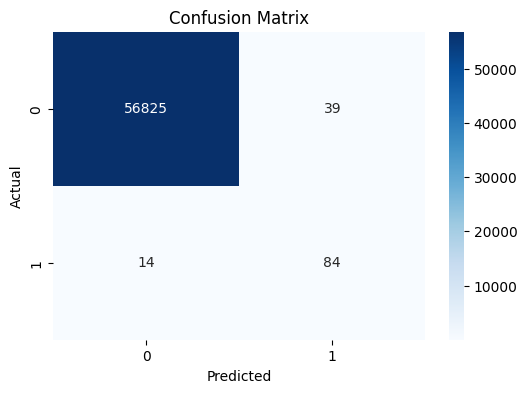

In [ ]:
# Predictions and evaluation

y_pred = (model_dense.predict(X_test) > 0.5).astype(int)

print(" Evaluation Results:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the model
model_dense.save("fraud_model_dense.h5")
print(" Model saved as fraud_model_dense.h5")


 Model saved as fraud_model_dense.h5


prepare legit only dataset for training

In [ ]:
#filter only legit transactions
df_legit = df[df['Class'] == 0].copy()

X_legit = df_legit.drop('Class', axis=1)
#scaling again in case
scaler_ae = StandardScaler()
X_legit_scaled = scaler_ae.fit_transform(X_legit)

#convert to numpy
X_legit_scaled = np.array(X_legit_scaled)
print('legit-only dataset ready. shape:',X_legit_scaled.shape)

legit-only dataset ready. shape: (284315, 29)


the autoencoder model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

input_dim = X_legit_scaled.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
encoder=Dense(7, activation='relu')(encoder)
decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder =  Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 29)             │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,072 (4.19 KB)

 Trainable params: 1,072 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

train the autoencoder

In [ ]:
autoencoder.fit(
    X_legit_scaled,X_legit_scaled,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.9327 - val_loss: 0.7467
Epoch 2/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6874 - val_loss: 0.6675
Epoch 3/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6036 - val_loss: 0.6362
Epoch 4/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5710 - val_loss: 0.6171
Epoch 5/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5506 - val_loss: 0.6004
Epoch 6/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5364 - val_loss: 0.5868
Epoch 7/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5154 - val_loss: 0.5783
Epoch 8/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5170 - val_loss: 0.5715
Epoch 9/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5045 - val_loss: 0.5668
Epoch 10/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4973 - val_loss: 0.5672
Epoch 11/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4948 - val_loss: 0.5613
Epoch 12/20
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

evaluate on full dataset

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
autoencoder anomaly threshold: nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/

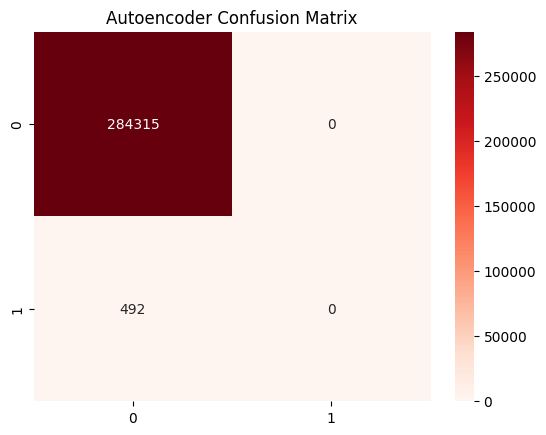

In [ ]:
X_scaled = scaler_ae.transform(df.drop('Class', axis=1))

#reconstruct all transactions
reconstructions = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - reconstructions), axis=1)

threshold = np.mean(reconstruction_errors['Class'==0]) + 2*np.std(reconstruction_errors[df['Class']==0])
print('autoencoder anomaly threshold:', threshold)

#flag predictions
y_ae_pred = (reconstruction_errors > threshold).astype(int)
y_true = df['Class']

#evaluate
print(classification_report(y_true, y_ae_pred))
sns.heatmap(confusion_matrix(y_true, y_ae_pred), annot=True, fmt='d',cmap='Reds')
plt.title('Autoencoder Confusion Matrix')
plt.show()

In [ ]:
autoencoder.save('fraud_model_autoencoder.h5')
print('Autoencoder model saved as fraud_model_autoencoder.h5')

Autoencoder model saved as fraud_model_autoencoder.h5


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reload original data
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

# Normalize features
scaler_lstm = MinMaxScaler()
X_scaled = scaler_lstm.fit_transform(df.drop(['Time', 'Class'], axis=1))

# Create sequences
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, df['Class'].values, time_steps=10)

print(" Sequence shape:", X_seq.shape, "Labels:", y_seq.shape)


 Sequence shape: (284797, 10, 29) Labels: (284797,)


In [ ]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        24,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,513 (142.63 KB)

 Trainable params: 36,513 (142.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9873 - loss: 0.0710 - val_accuracy: 0.9979 - val_loss: 0.0151
Epoch 2/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9984 - loss: 0.0123 - val_accuracy: 0.9979 - val_loss: 0.0151
Epoch 3/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9985 - loss: 0.0117 - val_accuracy: 0.9979 - val_loss: 0.0152
Epoch 4/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9985 - loss: 0.0115 - val_accuracy: 0.9979 - val_loss: 0.0150
Epoch 5/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9983 - loss: 0.0127 - val_accuracy: 0.9979 - val_loss: 0.0152
Epoch 6/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9983 - loss: 0.0126 - val_accuracy: 0.9979 - val_loss: 0.0151
Epoch 7/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9984 - loss: 0.0124 - val_accuracy: 0.9979 - val_loss: 0.0153
Epoch 8/10
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9984 - loss: 0.0121 - val_accuracy: 0.

1780/1780 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.00      0.00      0.00       104

    accuracy                           1.00     56960
   macro avg       0.50      0.50      0.50     56960
weighted avg       1.00      1.00      1.00     56960



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


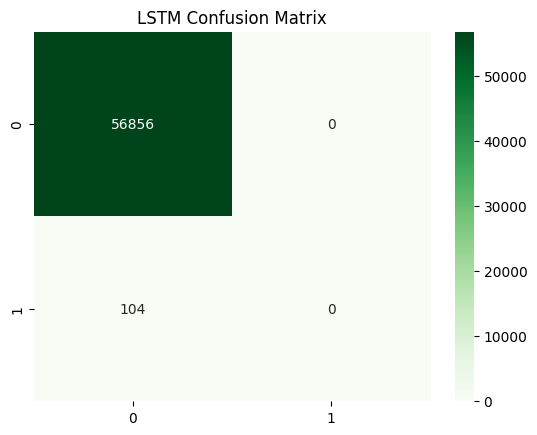

In [ ]:
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype(int)

print(classification_report(y_test_lstm, y_pred_lstm))
sns.heatmap(confusion_matrix(y_test_lstm, y_pred_lstm), annot=True, fmt='d', cmap='Greens')
plt.title("LSTM Confusion Matrix")
plt.show()


In [ ]:
model_lstm.save("fraud_model_lstm.h5")
print(" LSTM model saved as fraud_model_lstm.h5")


 LSTM model saved as fraud_model_lstm.h5


combining three models together

In [ ]:
from tensorflow.keras.models import load_model

model_dense = load_model("fraud_model_dense.h5")
model_auto = load_model("fraud_model_autoencoder.h5", compile=False)
model_lstm = load_model("fraud_model_lstm.h5")


define combined predictions

In [ ]:
def combined_prediction(X_row_raw, X_row_seq, scaler_dense, scaler_ae, scaler_lstm, threshold_ae):
    #  Dense prediction
    x_dense = scaler_dense.transform([X_row_raw])
    y_pred_dense = model_dense.predict(x_dense)[0][0]

    #  Autoencoder prediction (reconstruction error)
    x_ae = scaler_ae.transform([X_row_raw])
    recon = model_auto.predict(x_ae)
    error = np.mean(np.square(x_ae - recon))
    y_pred_ae = 1 if error > threshold_ae else 0

    #  LSTM prediction (sequence input)
    x_seq = scaler_lstm.transform(X_row_seq)
    x_seq = np.expand_dims(x_seq, axis=0)  # (1, timesteps, features)
    y_pred_lstm = model_lstm.predict(x_seq)[0][0]

    #  Combine predictions (weighted average)
    combined_score = (0.4 * y_pred_dense) + (0.3 * y_pred_ae) + (0.3 * y_pred_lstm)
    combined_label = 1 if combined_score > 0.5 else 0

    return {
        "dense": float(y_pred_dense),
        "autoencoder_error": float(error),
        "autoencoder_pred": int(y_pred_ae),
        "lstm": float(y_pred_lstm),
        "final_score": float(combined_score),
        "final_prediction": int(combined_label)
    }


In [ ]:
print("Scaler - Dense expects:", scaler.n_features_in_)
print("Scaler - AE expects:", scaler_ae.n_features_in_)
print("Scaler - LSTM expects:", scaler_lstm.n_features_in_)


Scaler - Dense expects: 29
Scaler - AE expects: 29
Scaler - LSTM expects: 29


In [ ]:
from tensorflow.keras.models import load_model
import joblib

model_dense = load_model("fraud_model_dense.h5")
scaler = joblib.load("scaler_dense.pkl")


In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
example_raw = df.drop(['Class', 'Time'], axis=1).iloc[3000].values
example_seq = df.drop(['Class', 'Time'], axis=1).iloc[2990:3000].values  # simulate time series

result = combined_prediction(example_raw, example_seq, scaler, scaler_ae, scaler_lstm, threshold)
print(result)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
{'dense': 4.014341174992391e-23, 'autoencoder_error': 0.5214097860808893, 'autoencoder_pred': 0, 'lstm': 0.0016510550631210208, 'final_score': 0.0004953165189363062, 'final_prediction': 0}


real word explanation of the model

In [ ]:
!pip install shap --quiet


load Trained Model and Scaler

In [ ]:
from pickle import load
import shap
import joblib
import pandas as pd
from tensorflow.keras.models import load_model

#load model and scaler
model_dense=load_model('fraud_model_dense.h5')
scaler = joblib.load('scaler_dense.pkl')



#load dataset
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.drop(['Time'], axis=1, inplace=True)

X = df.drop(['Class'], axis=1)
y = df['Class']
# scale features
X_scaled = scaler.transform(X)

PermutationExplainer explainer: 101it [00:20,  3.50it/s]


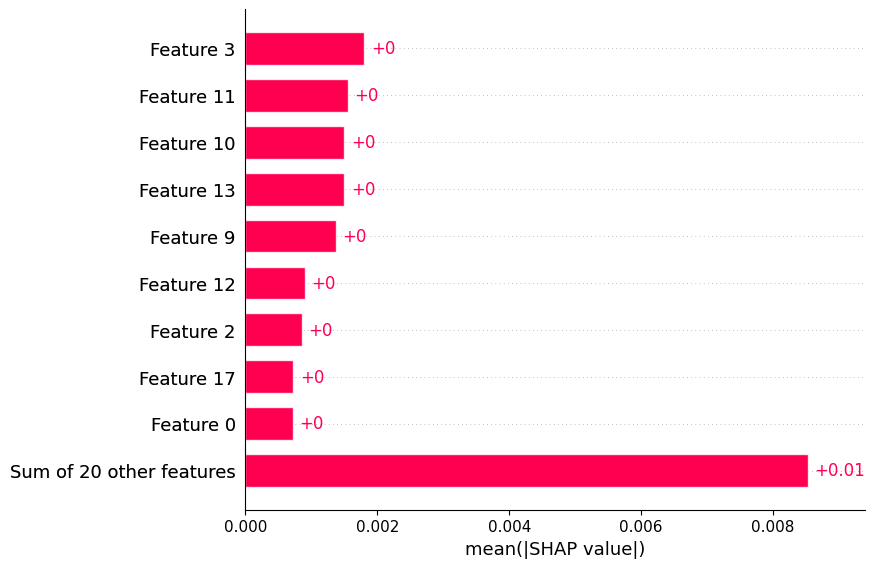

In [ ]:
import shap

X_sample = X_scaled[:100]
explainer = shap.Explainer(model_dense, X_sample)
shap_values = explainer(X_sample)
shap.plots.bar(shap_values)


In [ ]:
import os

# Create folders for clean structure
folders = [
    "models",
    "scalers",
    "data",
    "api",
    "dashboard",
    "explainability",
    "logs"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print(" Project folders created successfully.")

 Project folders created successfully.


save models and scalers

In [ ]:
from keras.models import load_model
import joblib

# Save models
model_dense.save("models/fraud_model_dense.h5")
model_auto.save("models/fraud_model_autoencoder.h5")
model_lstm.save("models/fraud_model_lstm.h5")

# Save scalers
joblib.dump(scaler, "scalers/scaler_dense.pkl")
joblib.dump(scaler_ae, "scalers/scaler_autoencoder.pkl")
joblib.dump(scaler_lstm, "scalers/scaler_lstm.pkl")

print(" Models and scalers saved to organized folders.")


 Models and scalers saved to organized folders.


In [ ]:
def load_all_models_and_scalers():
    models = {
        "dense": load_model("models/fraud_model_dense.h5"),
        "autoencoder": load_model("models/fraud_model_autoencoder.h5", compile=False),
        "lstm": load_model("models/fraud_model_lstm.h5")
    }

    scalers = {
        "dense": joblib.load("scalers/scaler_dense.pkl"),
        "autoencoder": joblib.load("scalers/scaler_autoencoder.pkl"),
        "lstm": joblib.load("scalers/scaler_lstm.pkl")
    }

    return models, scalers

# Example use
models, scalers = load_all_models_and_scalers()
print(" All models and scalers loaded successfully.")


 All models and scalers loaded successfully.


preparing shape

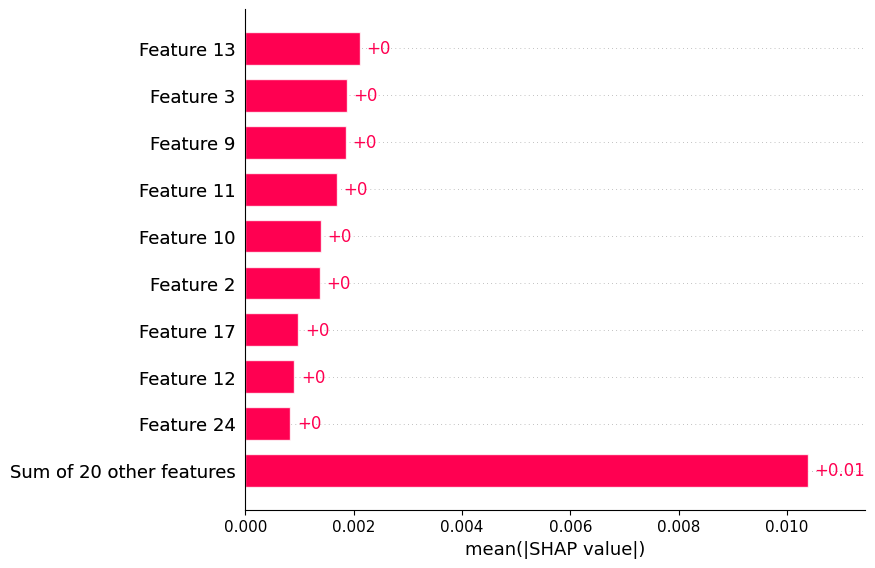

In [ ]:
import shap
import numpy as np


X_sample = X_scaled[:100]
explainer = shap.Explainer(model_dense, X_sample)
shap_values = explainer(X_sample)
shap.plots.bar(shap_values)


<ipython-input-34-024dc21f7ac1>:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample)


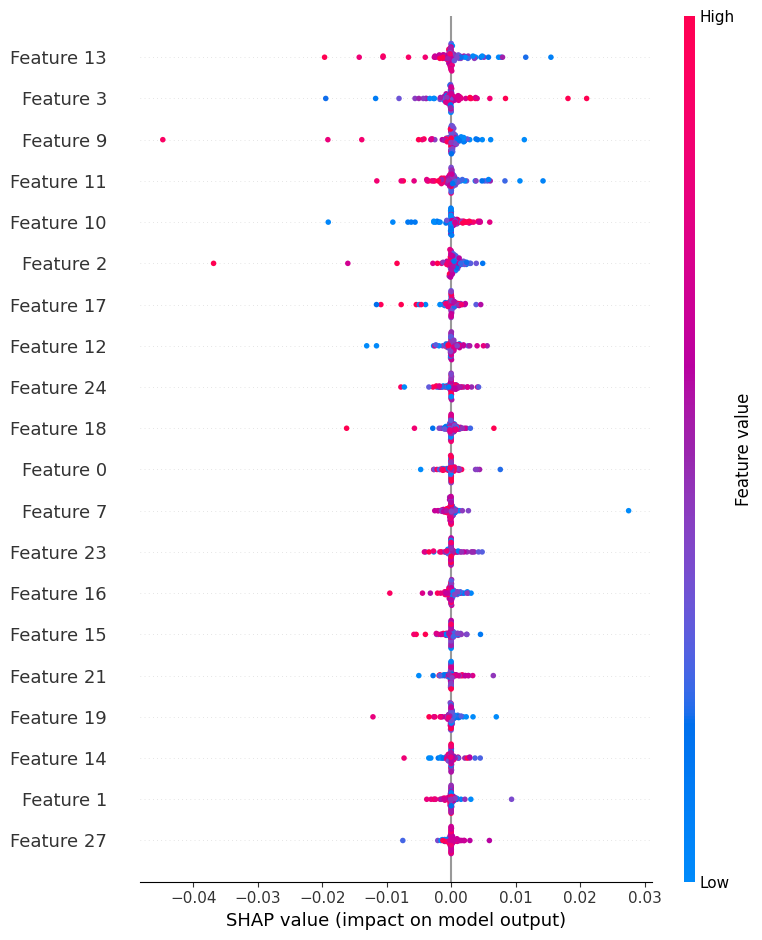

In [ ]:
# Summary plot - feature importance globally
shap.summary_plot(shap_values, X_sample)

# Force plot - for a single transaction
shap.plots.force(shap_values[0])


<ipython-input-35-dc545104bea2>:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample, show=False)


 SHAP visual saved to explainability/shap_summary.png


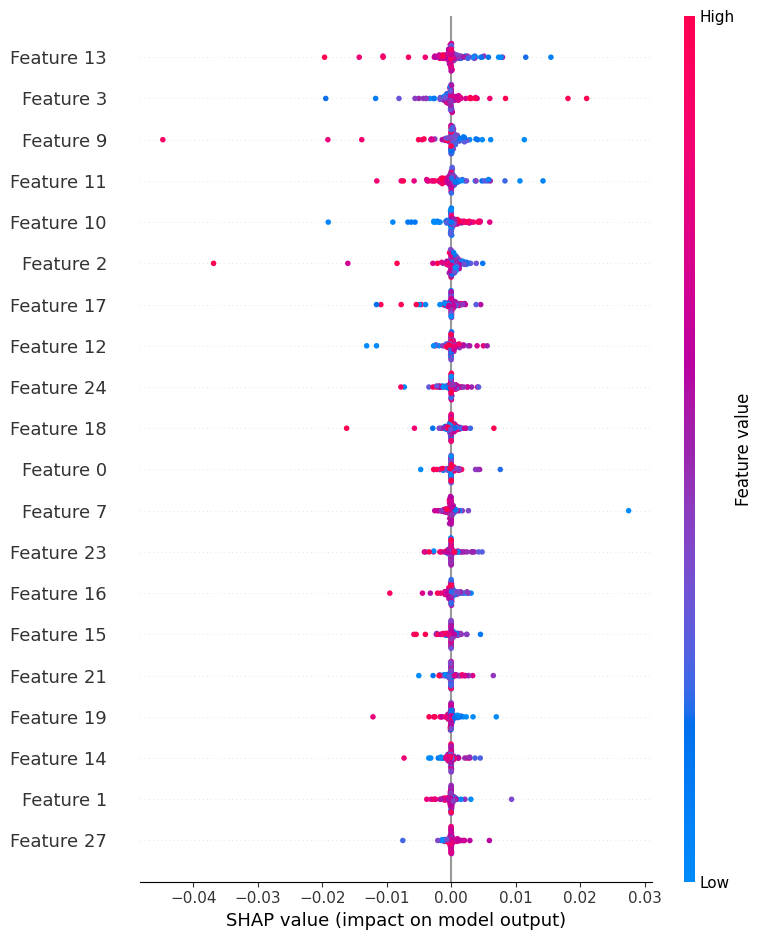

In [ ]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values, X_sample, show=False)
plt.savefig("explainability/shap_summary.png", bbox_inches='tight')

print(" SHAP visual saved to explainability/shap_summary.png")


automate shap for new predictions

In [ ]:
def explain_prediction(input_data, model, explainer):
    shap_values = explainer(input_data)
    shap.plots.waterfall(shap_values[0])


fAST API AND UNICORN

In [ ]:
!pip install fastapi uvicorn[standard] python-multipart joblib --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
!rm logs/api.log


rm: cannot remove 'logs/api.log': No such file or directory


In [ ]:
# api/fraud_api.py

from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import numpy as np
import joblib
from keras.models import load_model
import logging
import os

# Logging Setup
log_dir = "logs"
os.makedirs(log_dir, exist_ok=True)

logging.basicConfig(
    filename=os.path.join(log_dir, "api.log"),
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

logger = logging.getLogger(__name__)

#  FastAPI App
app = FastAPI(title="AI Fraud Detection API")

#  Load Models & Scalers
try:
    model_dense = load_model("models/fraud_model_dense.h5")
    model_auto = load_model("models/fraud_model_autoencoder.h5", compile=False)
    model_lstm = load_model("models/fraud_model_lstm.h5")

    scaler_dense = joblib.load("scalers/scaler_dense.pkl")
    scaler_ae = joblib.load("scalers/scaler_autoencoder.pkl")
    scaler_lstm = joblib.load("scalers/scaler_lstm.pkl")

    logger.info(" Models and scalers loaded successfully.")
except Exception as e:
    logger.error(f" Failed to load models/scalers: {e}")
    raise

#  Input Schema
class Transaction(BaseModel):
    features: list  # Expecting 29 raw features

#  Prediction Endpoint
@app.post("/predict")
def predict_fraud(data: Transaction):
    if len(data.features) != 29:
        raise HTTPException(status_code=400, detail="Expected 29 features.")

    try:
        x = np.array(data.features).reshape(1, -1)
        logger.info(f" Input: {x.tolist()}")

        # Dense
        x_dense = scaler_dense.transform(x)
        pred_dense = model_dense.predict(x_dense)[0][0]

        # Autoencoder
        x_ae = scaler_ae.transform(x)
        reconstructed = model_auto.predict(x_ae)
        recon_error = np.mean(np.square(x_ae - reconstructed))

        # LSTM
        x_seq = scaler_lstm.transform(x).reshape(1, 1, 29)
        pred_lstm = model_lstm.predict(x_seq)[0][0]

        is_fraud = (
            pred_dense > 0.5 or
            recon_error > 0.01 or
            pred_lstm > 0.5
        )

        result = {
            "fraud_detected": bool(is_fraud),
            "dense_score": float(pred_dense),
            "autoencoder_error": float(recon_error),
            "lstm_score": float(pred_lstm)
        }

        logger.info(f" Output: {result}")
        return result

    except Exception as e:
        logger.error(f" Prediction error: {e}")
        raise HTTPException(status_code=500, detail="Prediction failed")


In [ ]:
!uvicorn api.fraud_api:app --host 0.0.0.0 --port 8000 --reload


INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [5819] using WatchFiles
ERROR:    Error loading ASGI app. Could not import module "api.fraud_api".
INFO:     Stopping reloader process [5819]


In [ ]:
import os

os.makedirs("api", exist_ok=True)

with open("api/fraud_api.py", "w") as f:
    f.write("""
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import numpy as np
import joblib
from keras.models import load_model

app = FastAPI(title="AI Fraud Detection API")

model_dense = load_model("models/fraud_model_dense.h5")
model_auto = load_model("models/fraud_model_autoencoder.h5", compile=False)
model_lstm = load_model("models/fraud_model_lstm.h5")

scaler_dense = joblib.load("scalers/scaler_dense.pkl")
scaler_ae = joblib.load("scalers/scaler_autoencoder.pkl")
scaler_lstm = joblib.load("scalers/scaler_lstm.pkl")

class Transaction(BaseModel):
    features: list

@app.post("/predict")
def predict_fraud(data: Transaction):
    if len(data.features) != 29:
        raise HTTPException(status_code=400, detail="Expected 29 features.")

    x = np.array(data.features).reshape(1, -1)

    x_dense = scaler_dense.transform(x)
    pred_dense = model_dense.predict(x_dense)[0][0]

    x_ae = scaler_ae.transform(x)
    reconstructed = model_auto.predict(x_ae)
    recon_error = np.mean(np.square(x_ae - reconstructed))

    x_seq = scaler_lstm.transform(x).reshape(1, 1, 29)
    pred_lstm = model_lstm.predict(x_seq)[0][0]

    is_fraud = (
        pred_dense > 0.5 or
        recon_error > 0.01 or
        pred_lstm > 0.5
    )

    return {
        "fraud_detected": bool(is_fraud),
        "dense_score": float(pred_dense),
        "autoencoder_error": float(recon_error),
        "lstm_score": float(pred_lstm)
    }
    """)


In [ ]:
with open("api/__init__.py", "w") as f:
    f.write("# make this a package")
